# K-Means Clustering

#### Basic KMeans Algorithm <br>
Step 1: Choose the number of KF clusters <br>
Step 2: Select at random K points, the centroids(not necessarily from your dataset)<br>
Step 3: Assign each datapoint to the closest centroid - That forms K clusters (Eucledian distance or any other distance)<br>
Step 4: Compute and place the new centroid of each cluster.<br>
Step 5: Reassign each data point to the new closest centroid. 
If any reassignment took place, go to step 4, otherwise finish.<br>

But the approach has fault.. the Random Initialization Trap. Solution is to use KMeans++ on choosing the right centroids.

#### Choosing the right number of clusters  <br>
Use WCSS (Within cluster sum of squares) to find the goodness of fit 

WCSS = $\sum\limits_{P_i  in  Cluster 1} distance(P_i,C_1)^2 $ + $\sum\limits_{P_i  in  Cluster 2} distance(P_i,C_2)^2 $ + $\sum\limits_{P_i  in  Cluster 3} distance(P_i,C_3)^2 $

Idea is to minimize the WCSS but to an optimal extent otherwise each point will be a cluster and WCSS will become zero. 

Here we can use the **elbow method** to find where to break. Look below chart to see more

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# for resizing the graph
%matplotlib notebook
plt.ioff()    # this stops the graphs from overwriting each other

In [2]:
# Importing the dataset
# data set about customer who visited a mall and their spending 
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
X = dataset.iloc[:, [3, 4]].values # For the sake of visualization(2D) we will only omit gender and age.

<IPython.core.display.Javascript object>


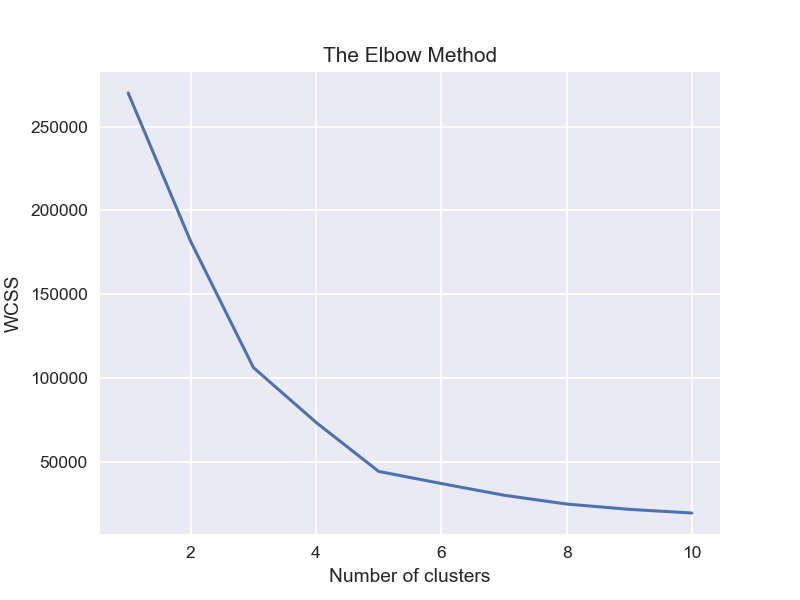

In [5]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = [] #Within cluster sum of squares.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Fitting K-Means to the dataset . We can see from the elbow method that 5 is the optimum number of clusters.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

<IPython.core.display.Javascript object>


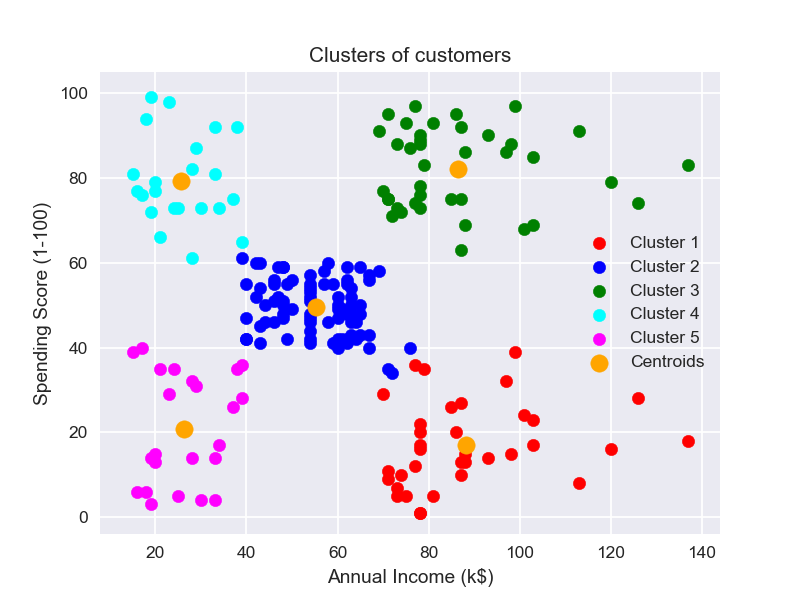

In [7]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1') #Careful
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2') #Standard
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3') #Target
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4') #Careless
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5') #Sensible
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

### Types
1. Agglomerative
2. Divisive

### Agglomerative algorithm
1. Make each data point a single point cluster -> That forms n clusters
2. Take the two closest data points and make them one cluster. -> That forms n-1 cluster
3. Take the two **closest clusters** and make them one cluster. -> That forms n-2 clusters
4. Repeat Step 3 until there is only one cluster

##### Distance between two clusters
1. Closest points
2. Furthest points
3. Average distance
4. Distance between the centroids

#### Dendograms
Now plot the distance on the **Dendograms** plot which is a chart of datapoints on x-axis and eucledian distance on y-axis.
Looking at the graph and you can find the optimal number of clusters. One of the standard approach is to find the longest vertical line which doesn't cross any horizontal line


<IPython.core.display.Javascript object>


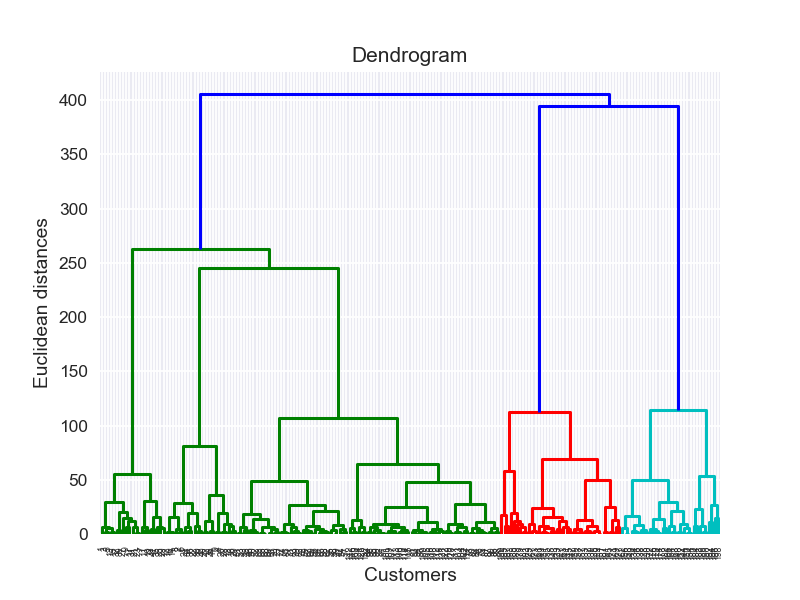

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #Look up documentation to find more options
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# We can observe that the largest distance cuts 5 horizontal lines, hence the optimal number of clusters is 5.

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #Use ward to minimize variance within a cluster
y_hc = hc.fit_predict(X)


<IPython.core.display.Javascript object>


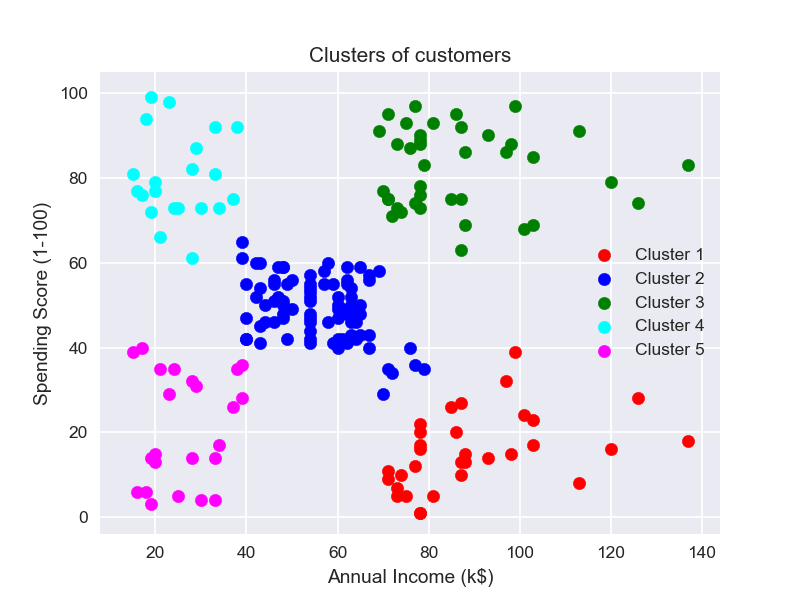

In [10]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### K-Means 
**Pros**

Simple to understand, easily adaptable,
works well on small or large datasets,
fast, efficient and performant

**Cons**

Need to choose the number of clusters
### Hierarchical Clustering
**Pros**

The optimal number of clusters can be
obtained by the model itself, practical
visualisation with the dendrogram

**Cons**

Not appropriate for large datasets
